In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.contingency import association
from pandas.api.types import is_object_dtype, is_numeric_dtype

In [3]:
# read dataframe according to the provided dtypes
df_dtypes = pd.read_csv("data/df_dtypes.csv", index_col="Column")
df_dtypes_dict = df_dtypes.to_dict()["Dtype"]
df = pd.read_csv(
  "data/df.csv",
  dtype=df_dtypes_dict,
  index_col="HouseId",
)

In [4]:
tail = 0.075
lower = df["SqMeterCost"].quantile(tail)
upper = df["SqMeterCost"].quantile(1 - tail)
df["SqMeterCost"] = df["SqMeterCost"].apply(
  lambda x: lower if x < lower else upper if x > upper else x
)

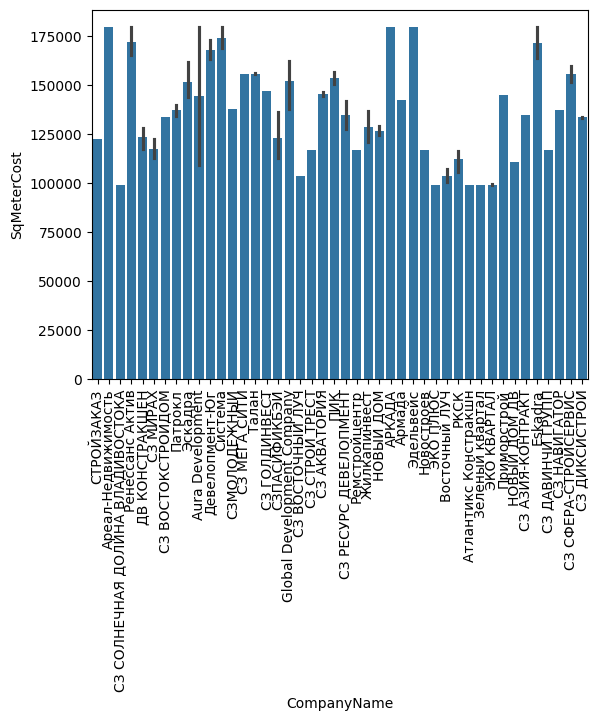

In [5]:
# CompanyName seems to be significant
ax = sns.barplot(
  data=df,
  x="CompanyName",
  y="SqMeterCost",
  errorbar=("ci", 95),
)
ax.tick_params(axis="x", rotation=90)

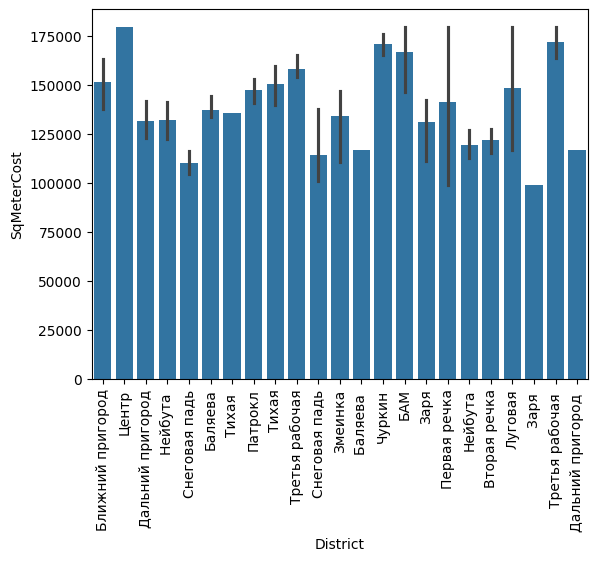

In [6]:
# District seems to be significant
ax = sns.barplot(
  data=df,
  x="District",
  y="SqMeterCost",
  errorbar=("ci", 95),
)
ax.tick_params(axis="x", rotation=90)

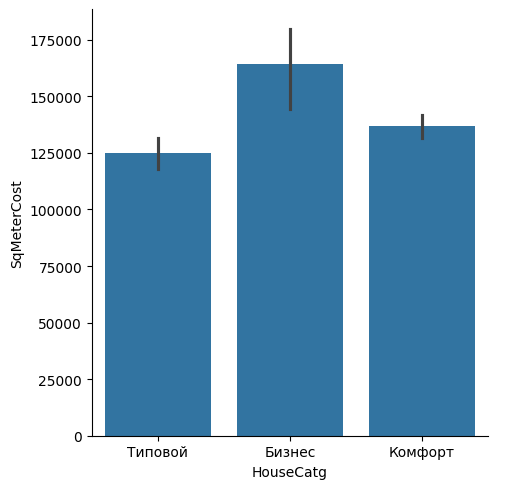

In [7]:
# HouseCatg and HouseStatus aren't significant
fig = sns.catplot(
  data=df,
  kind="bar",
  x="HouseCatg",
  y="SqMeterCost",
  errorbar=("ci", 95),
)

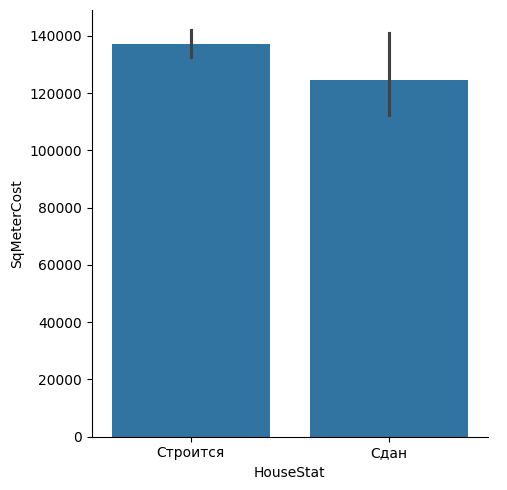

In [8]:
# HouseCatg and HouseStatus aren't significant
fig = sns.catplot(
  data=df,
  kind="bar",
  x="HouseStat",
  y="SqMeterCost",
  errorbar=("ci", 95),
)

In [28]:
def cramer(cols: list[str]):
  n = len(cols)
  assoc = np.empty((n, n))
  for y, col_y in enumerate(cols):
    for x, col_x in enumerate(cols):
      crosstab = pd.crosstab(df[col_y], df[col_x])
      assoc[y][x] = association(crosstab)
  _ = sns.heatmap(pd.DataFrame(assoc, index=cols, columns=cols))

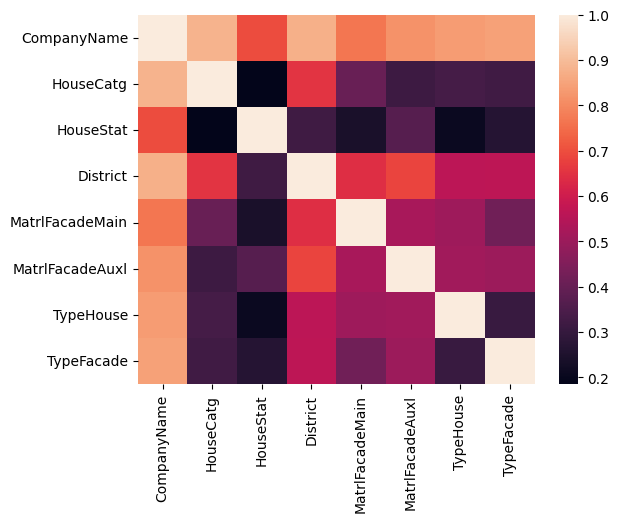

In [29]:
cat_cols = df.dtypes[df.dtypes.map(is_object_dtype)].index.to_list()
cramer(cat_cols)

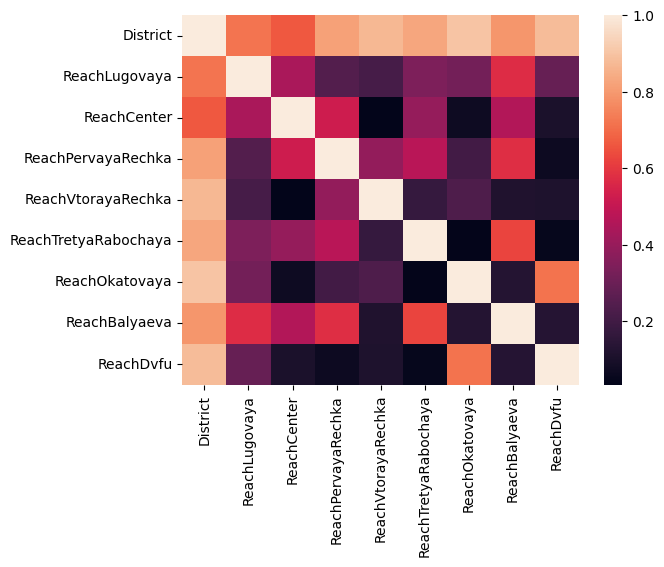

In [30]:
place_cols = ["District"] + list(
  filter(lambda col: col.startswith("Reach"), df.columns)
)
cramer(place_cols)

/home/makcymal/miniconda3/envs/pyenv/lib/python3.12/site-packages/scipy/stats/contingency.py:459: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/home/makcymal/miniconda3/envs/pyenv/lib/python3.12/site-packages/scipy/stats/contingency.py:459: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/home/makcymal/miniconda3/envs/pyenv/lib/python3.12/site-packages/scipy/stats/contingency.py:459: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/home/makcymal/miniconda3/envs/pyenv/lib/python3.12/site-packages/scipy/stats/contingency.py:459: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/home/makcymal/miniconda3/envs/pyenv/lib/python3.12/site-packages/scipy/stats/contingency.py:459: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_

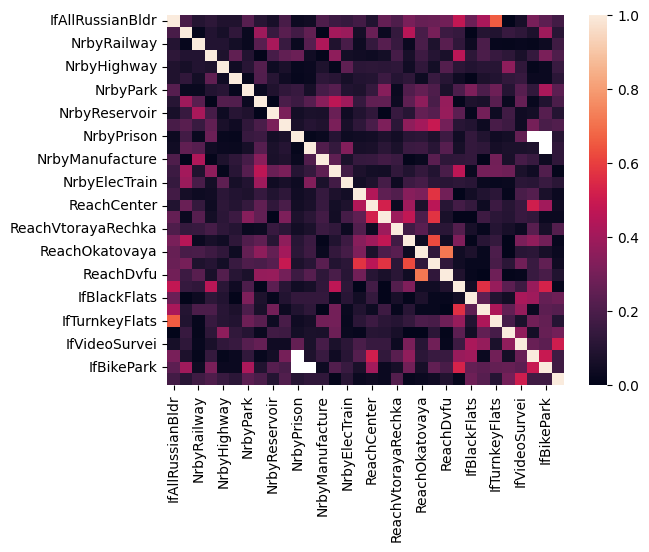

In [38]:
bool_cols_pred = df.columns.map(
  lambda col: is_numeric_dtype(df[col].dtype)
  and df[col].min() == 0
  and df[col].max() == 1
)
bool_cols = df.columns[bool_cols_pred].to_list()
cramer(bool_cols)